In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import tetrion.plots as plots
import tetrion.db
import tetrion.commands as cmd
import tetrion.options
import tetrion.clientcore
import seaborn as sns
from collections import defaultdict
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
%matplotlib inline 
symbol = pd.read_csv('/local/dist/tetrion/conf/conf/symbol.table', skiprows= 1, header = 2,  delim_whitespace=True)
pd.set_option('display.max_rows', 100)
import datetime as dt

In [6]:
df = pd.read_pickle('../data/txo_vix_2025H2.pkl')
df2 =pd.read_pickle('../data/txo_vix_2025H1.pkl')
df3 = pd.read_pickle('../data/txo_vix_2024H2.pkl')

In [8]:
df = pd.concat([df,df2, df3])

In [9]:
df

,time,vix_like
0,2025-06-02 08:45:00,28.349213
1,2025-06-02 08:50:00,26.695815
2,2025-06-02 08:55:00,26.974711
3,2025-06-02 09:00:00,26.569628
4,2025-06-02 09:05:00,26.581695
...,...,...
4914,2024-12-31 13:25:00,18.427403
4915,2024-12-31 13:30:00,18.474666
4916,2024-12-31 13:35:00,18.474342
4917,2024-12-31 13:40:00,18.409071


In [12]:
df = df.sort_values("time").reset_index(drop=True)


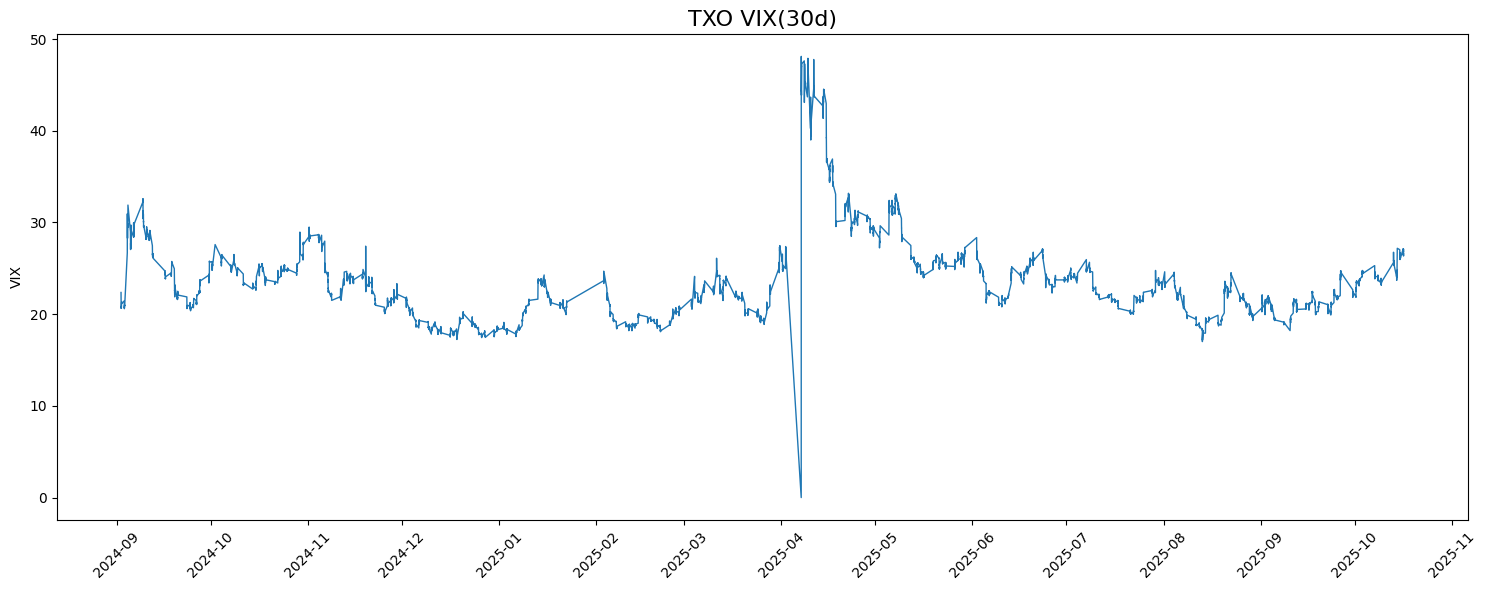

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import NullLocator   

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df["time"], df["vix_like"], lw=1)

ax.set_title("TXO VIX(30d)", fontsize=16)
ax.set_ylabel("VIX")

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax.xaxis.set_minor_locator(NullLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.drop

,time,vix_like
0,2024-09-02 08:45:00,22.364070
1,2024-09-02 08:50:00,22.129560
2,2024-09-02 08:55:00,21.751241
3,2024-09-02 09:00:00,21.597315
4,2024-09-02 09:05:00,21.397635
...,...,...
16317,2025-10-16 13:25:00,27.072439
16318,2025-10-16 13:30:00,26.912163
16319,2025-10-16 13:35:00,26.633825
16320,2025-10-16 13:40:00,26.338607


In [24]:
df = df[df["vix_like"] != 0].copy()


In [25]:
import plotly.express as px

fig = px.line(df, x="time", y="vix_like", title="TXO VIX(30d)")
fig.show()


In [26]:
df.to_pickle("txo_vix_all.pkl")